In [1]:
import os 
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
plt.style.use('dark_background')

In [5]:
lista_dir_test = ['Yorkshire_Test','Labrador_Test','ShihTzu_Test','Doberman_Test']
lista_dir_train = ['ShihTzu','Yorkshire','Doberman','Labrador']
class_names = lista_dir_train

In [6]:


test_images=[]
test_labels=[]
for x,i in enumerate(lista_dir_test):
    for j in os.listdir("Dogs/"+i):
        im = Image.open("Dogs/"+i+"/"+j)
        im = im.resize((120,120))
        test_images.append((np.asarray(im.convert("LA"))[:,:,0]))
        test_labels.append(x)

In [7]:
len(test_labels), len(test_images)

(120, 120)

In [8]:
set(test_labels)

{0, 1, 2, 3}

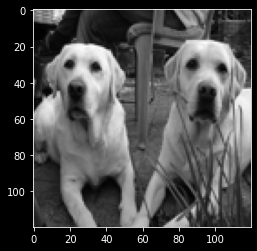

In [9]:
plt.imshow(test_images[55], cmap="binary_r")
plt.show()

In [10]:
train_images=[]
train_labels=[]
for x,i in enumerate(lista_dir_train):
    for j in os.listdir("Dogs/"+i):
        im = Image.open("Dogs/"+i+"/"+j)
        im = im.resize((120,120))
        train_images.append((np.asarray(im.convert("LA"))[:,:,0]))
        train_labels.append(x)

In [11]:
len(train_labels), len(train_images)


(400, 400)

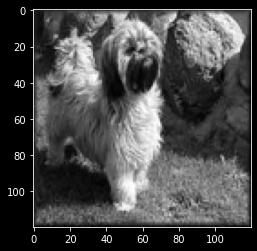

In [12]:
plt.imshow(train_images[39], cmap="binary_r")
plt.show()

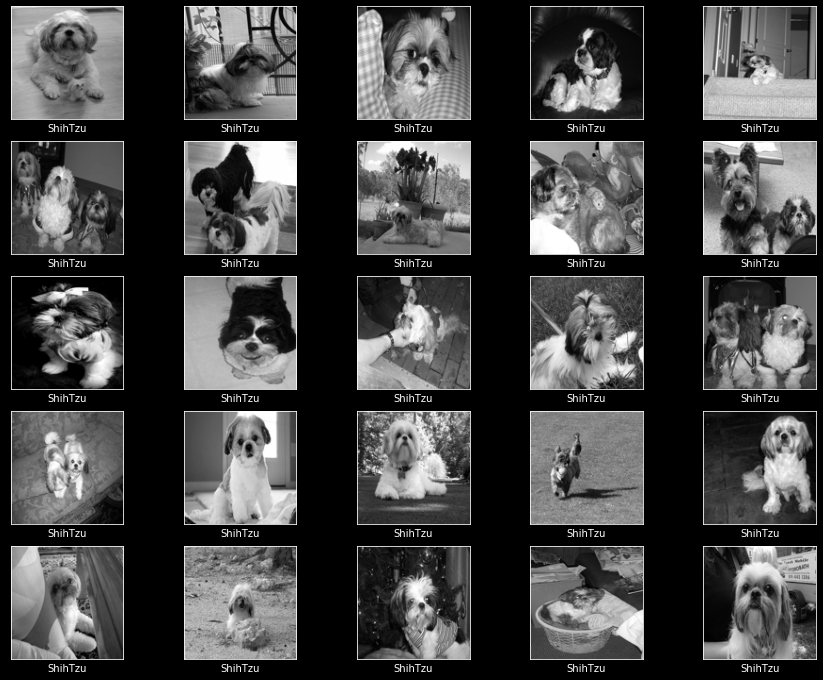

In [13]:
plt.figure(figsize=(15,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap="binary_r")
    plt.xlabel(class_names[train_labels[i]])

plt.show()

In [14]:
train_images = np.array(train_images)/255
test_images = np.array(test_images)/255


In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(120, 120)),
    keras.layers.Dense(1000, activation='sigmoid'),
    keras.layers.Dense(750, activation='sigmoid'),
    keras.layers.Dense(500, activation='sigmoid'),
    keras.layers.Dense(200, activation='sigmoid'),
    keras.layers.Dense(100, activation='sigmoid'),
    keras.layers.Dense(4, activation='softmax') #el 10 es necesario porque son 10 clases 
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 14400)             0         
_________________________________________________________________
dense (Dense)                (None, 1000)              14401000  
_________________________________________________________________
dense_1 (Dense)              (None, 750)               750750    
_________________________________________________________________
dense_2 (Dense)              (None, 500)               375500    
_________________________________________________________________
dense_3 (Dense)              (None, 200)               100200    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 4

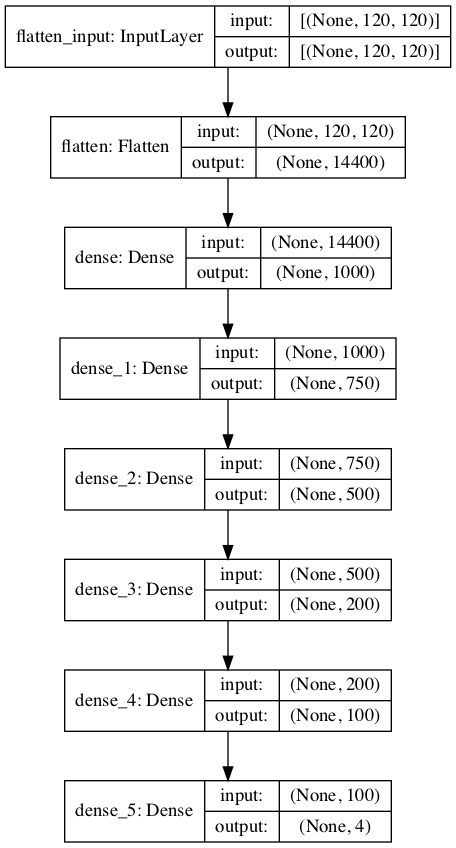

In [17]:
keras.utils.plot_model(model,"model.png",show_shapes=True)

In [21]:
# Elegimos hiperparametros 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
model.fit(train_images, train_labels, epochs=20, verbose=1)

Epoch 1/20
400/400 [==============================] - 3s 8ms/sample - loss: 1.4354 - acc: 0.2275
Epoch 2/20
400/400 [==============================] - 2s 6ms/sample - loss: 1.4104 - acc: 0.2375
Epoch 3/20
400/400 [==============================] - 2s 5ms/sample - loss: 1.4051 - acc: 0.2125
Epoch 4/20
400/400 [==============================] - 2s 6ms/sample - loss: 1.4030 - acc: 0.2225
Epoch 5/20
400/400 [==============================] - 2s 6ms/sample - loss: 1.3993 - acc: 0.2550
Epoch 6/20
400/400 [==============================] - 3s 7ms/sample - loss: 1.3819 - acc: 0.2750
Epoch 7/20
400/400 [==============================] - 3s 6ms/sample - loss: 1.3743 - acc: 0.2650
Epoch 8/20
400/400 [==============================] - 2s 6ms/sample - loss: 1.3525 - acc: 0.3200
Epoch 9/20
400/400 [==============================] - 2s 6ms/sample - loss: 1.3488 - acc: 0.3350
Epoch 10/20
400/400 [==============================] - 2s 5ms/sample - loss: 1.3208 - acc: 0.3625
Epoch 11/20
400/400 [========

In [23]:
test_loss, test_acc = model.evaluate(test_images,  test_labels)

print('\nTest accuracy:', test_acc)

120/120 [==============================] - 0s 2ms/sample - loss: 1.7350 - acc: 0.1833

Test accuracy: 0.18333334


In [24]:
predictions = model.predict(test_images)

In [25]:
print(predictions[0])

[0.3021305  0.305842   0.13299486 0.25903258]


In [26]:
history = model.fit(train_images, train_labels, epochs=20, verbose=1)

Epoch 1/20
400/400 [==============================] - 3s 7ms/sample - loss: 1.2672 - acc: 0.4150
Epoch 2/20
400/400 [==============================] - 2s 6ms/sample - loss: 1.3235 - acc: 0.3750
Epoch 3/20
400/400 [==============================] - 2s 6ms/sample - loss: 1.2901 - acc: 0.3725
Epoch 4/20
400/400 [==============================] - 2s 5ms/sample - loss: 1.2924 - acc: 0.3900
Epoch 5/20
400/400 [==============================] - 2s 5ms/sample - loss: 1.2561 - acc: 0.4000
Epoch 6/20
400/400 [==============================] - 2s 5ms/sample - loss: 1.2723 - acc: 0.3925
Epoch 7/20
400/400 [==============================] - 2s 5ms/sample - loss: 1.2510 - acc: 0.3950
Epoch 8/20
400/400 [==============================] - 2s 5ms/sample - loss: 1.2653 - acc: 0.3800
Epoch 9/20
400/400 [==============================] - 2s 6ms/sample - loss: 1.2555 - acc: 0.4100
Epoch 10/20
400/400 [==============================] - 2s 5ms/sample - loss: 1.2569 - acc: 0.4100
Epoch 11/20
400/400 [========

In [29]:
history # Variable que tiene la información del entrenamiento 

In [31]:
history.history["acc"]

[0.415,
 0.375,
 0.3725,
 0.39,
 0.4,
 0.3925,
 0.395,
 0.38,
 0.41,
 0.41,
 0.34,
 0.3425,
 0.3825,
 0.42,
 0.3475,
 0.335,
 0.3775,
 0.3825,
 0.36,
 0.385]

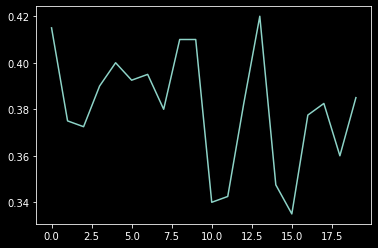

In [32]:
plt.plot(history.history["acc"])
plt.show()

In [37]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

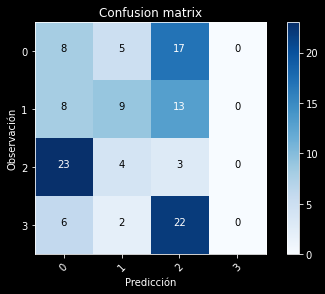

In [38]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools


Y_pred = model.predict(test_images)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis = 1)
# Convert validation observations to one hot vectors
Y_true =test_labels#= np.argmax(test_labels, axis = 1)
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
plot_confusion_matrix(confusion_mtx, classes = range(4))